# 파이썬 OpenCV를 이용한 영상처리_허진경
* Jupyter Notebook Info
>- Dayoung Yun
>- 2021/11/22

## 5장 화질 개선
### 잡음제거
#### 평균값 필터
>- 주목 화소와 주위 8근방 화소의 평균을 이용해서 잡음을 제거

In [1]:
import numpy as np

def mean_blur(img):
    A = np.zeros(img.shape, dtype = np.uint8)
    height, width = img.shape
    for y in range(1, height -1):
        for x in range(1, width-1):
            S = 1 * img[y-1, x-1] + img[y-1, x] + img[y-1, x+1]\
            +img[y, x-1] + img[y, x] + img[y, x+1] \
            +img[y+1, x-1] + img[y+1, x] + img[y+1, x+1]
        
            S = S/9
            if S > 255:
                A[y,x] = 255
            elif S <0:
                A[y,x] = 0
            else:
                A[y,x] = int(S)
            
    return A
    

In [2]:
import cv2

lena_gray = cv2.imread('lena_std.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('lena', lena_gray)
cv2.imshow('Mean Blur', mean_blur(lena_gray))
cv2.waitKey()
cv2.destroyAllWindows()

#### cv2.blur(src, ksize, [, borderType]) ->dst
>- 커널 영역의 모든 핅셀의 평균을 계산하고 현재 주목하는 중앙 화소를 이 평균으로 대체
>- 커널의 넓이와 높이를 지정해야 한다

In [3]:
import cv2

lena_gray = cv2.imread('lena_std.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('lena', lena_gray)
cv2.imshow('Mean Blur', cv2.blur(lena_gray,(3,3)))
cv2.waitKey()
cv2.destroyAllWindows()

#### 메디안 필터
>- 주목 화소와 8근방 화소의 중앙값을 이용해서 잡음을 제거
>- 화소를 정렬한 후 중앙값을 선택
>- 정렬하는 데 시간이 많이 소요

In [4]:
import numpy as np

def median_blur(img):
    A = np.zeros(img.shape, dtype = np.uint8)
    height, width = img.shape[:2]
    for y in range(height):
        for x in range(width):
            try:
                
                S = [img[y-1, x-1], img[y-1, x], img[y-1, x+1], \
                    img[y, x-1], img[y, x], img[y, x+1], \
                    img[y+1, x-1], img[y+1, x], img[y+1, x+1]]
                A[y,x] = np.median(S)
            except:
                pass
            
    return A

In [5]:
import cv2

lena_gray = cv2.imread('lena_std.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Lena', lena_gray)
cv2.imshow('Median', median_blur(lena_gray))
cv2.waitKey()
cv2.destroyAllWindows()

#### cv2.medianBlur(scr, ksize[, borderType]) -> dst

In [6]:
import cv2

lena_gray = cv2.imread('lena_std.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Lena', lena_gray)
cv2.imshow('Median', cv2.medianBlur(lena_gray, 3))
cv2.waitKey()
cv2.destroyAllWindows()

#### scipy.ndimage.median_filter(input, size = None, footprint = None, output = None, mode = 'reflect' , cval = 0.0, origin = 0)

In [7]:
from scipy import ndimage

import cv2

lena_gray = cv2.imread('lena_std.jpg', cv2.IMREAD_GRAYSCALE)
result = ndimage.median_filter(lena_gray, size = 3)
cv2.imshow('Lena', lena_gray)
cv2.imshow('Median filter', result)
cv2.waitKey()
cv2.destroyAllWindows()

#### 가우시안 필터
>- 필터는 중앙값이 가장 크고 멀어질수록 그 값이 작아지느 커널 사용
>- 현재 주목화소에 가중치를 더 부여하고 현재 화소와 상/하/좌/우 화소의 길이가 1이라면 대각선 성분의 길이는 루트2이므로 상/하/좌/우 화소는 대각선 화소에 비해 더 높은 가중치를 준다.

In [8]:
import numpy as np

def gaussian_blur(img):
    img_ = np.zeros(img.shape, dtype = np.uint8)
    height, width = img.shape
    for y in range(height):
        for x in range(width):
            try:
                T = 1 * img[y-1, x-1] + 2 * img[y-1, x] + 1 * img[y-1, x+1] \
                    + 2 * img[y, x-1] + 4 * img[y, x] + 2 * img[y, x+1] \
                    + 1* img[y+1, x-1] + 2* img[y+1, x] + 1 * img[y+1, x+1]
            
                img_[y,x] = int(T/16)
            except:
                pass
    return img_

In [9]:
import cv2

lena_gray = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Lena', gaussian_blur(lena_gray))
cv2.waitKey()
cv2.destroyAllWindows()

#### cv2.GaussicanBlur(src, ksize, sigmaX[, sigmaY, borderType]) -> dst
#### cv3.bilateralFilter(src, d, sigmaColor, sigmaSapce, [, borderType])->dst

In [10]:
import cv2

lena_gray = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Bilateral', cv2.bilateralFilter(lena_gray, 9, 0, 75))
cv2.imshow('Gaussian', cv2.GaussianBlur(lena_gray, (5,5), 75))
cv2.waitKey()
cv2.destroyAllWindows()

### 모폴로지 연산
>- 형태학적 변환
>- 수축, 팽창
#### 수축
>- 화소의 부근에 하나라도 0이면 그 화소를 0으로, 그 외는 255로 처리
>- 수축 후 물체의 두께 또는 크기가 감소하거나 단순히 흰색 영역이 이미지에서 감소
>- 작은 백색 잡음을 제거, 두 개의 연결된 개체를 분리하는 데 용이

In [11]:
import numpy as np

def contraction(img_in):
    height, width = img_in.shape
    img_out = np.zeros(img_in.shape, np.uint8)
    for y in range(1, height -1):
        for x in range(1, width-1):
            img_out[y,x] = img_in[y,x]
            if img_in[y-1, x-1] == 0 | img_in[y-1,x] == 0| \
               img_in[y-1, x+1] == 0 | img_in[y,x-1] == 0| \
               img_in[y, x+1] == 0 | img_in[y+1,x-1] == 0| \
               img_in[y+1, x] == 0 | img_in[y+1,x+1] == 0 :
                img_out[y, x] =0
    return img_out
            

In [12]:
import cv2

img5 = cv2.imread('five.png', cv2.IMREAD_GRAYSCALE)
img5_cont = contraction(img5)

cv2.imshow('5', img5)
cv2.imshow('수축', img5_cont)
cv2.waitKey()
cv2.destroyAllWindows()

#### 팽창
>- 화소 부근에 하나라도 255이면 그 화소를 255로, 그 외는 0으로 처리
>- 이미지의 흰색 영역이 증가하거나 전경 물체의 크기가 증가
>- 개체의 끊어진 부분을 결합하는 데 유용

In [13]:
import numpy as np

def expansion(img_in):
    height, width = img_in.shape
    img_out = np.zeros(img_in.shape, np.uint8)
    
    for y in range(1, height -1):
        for x in range(1, width-1):
            img_out[y,x] = img_in[y,x]
            if img_in[y-1, x-1] == 255 | img_in[y-1,x] == 255| \
               img_in[y-1, x+1] == 255 | img_in[y,x-1] == 255| \
               img_in[y, x+1] == 255 | img_in[y+1,x-1] == 255| \
               img_in[y+1, x] == 255 | img_in[y+1,x+1] == 255 :
                img_out[y, x] = 255
    return img_out


In [14]:
import cv2

img5 = cv2.imread('five.png', cv2.IMREAD_GRAYSCALE)
img5_exp = expansion(img5)

cv2.imshow('5', img5)
cv2.imshow('팽창',img5_exp)
cv2.waitKey()
cv2.destroyAllWindows()

#### 열기(Opening)
>- 수축 후 팽창
>- 검은 바탕의 흰 잡음을 없애줌

In [15]:
import cv2

img5 = cv2.imread('five.png', cv2.IMREAD_GRAYSCALE)

img5_cont = contraction(img5)
img5_exp = expansion(img5_cont)

cv2.imshow('5', img5)
cv2.imshow('contraction', img5_cont)
cv2.imshow('expansion', img5_exp)
cv2.waitKey()
cv2.destroyAllWindows()

#### 닫기(closing)
>- 팽창 후 수축
>- whole 제거에 유용

In [16]:
import cv2

img5 = cv2.imread('five.png', cv2.IMREAD_GRAYSCALE)

img5_exp = expansion(img5_cont)
img5_cont = contraction(img5)


cv2.imshow('5', img5)
cv2.imshow('expansion', img5_exp)
cv2.imshow('contraction', img5_cont)
cv2.waitKey()
cv2.destroyAllWindows()

#### cv2.erode(src, dst, kernel, anchor = (-1,1), iteration =1)
>- 수축을 위한 OpenCV함수

In [17]:
import cv2
import numpy as np

img = cv2.imread('j.png', 0)
kernel = np.ones((5,5), np.uint8)
cv2.imshow('j', img)
cv2.imshow('erode', cv2.erode(img, kernel, iterations = 1))
cv2.waitKey()
cv2.destroyAllWindows()

#### cv2.dilate(scrm dst, kernel, anchor=(-1,-1), iteration = 1)
>- 팽창을 위한 OpenCV함수

In [18]:
import cv2
import numpy as np

img = cv2.imread('j.png', 0)
kernel = np.ones((5,5), np.uint8)
cv2.imshow('j', img)
cv2.imshow('erode', cv2.dilate(img, kernel, iterations = 1))
cv2.waitKey()
cv2.destroyAllWindows()

#### cv2.morphologyEx(src, dst, op, kernel, anchor = (-1,-1), iteration = 1)
>- 수축 후 팽창과 팽창 후 수축을 위한 함수
>- **모폴로지타입**
>- MORPH_ERODE : 수축
>- MORPH_DILATE : 팽창
>- MORPH_OPEN : 수축 후 팽창
>- MORPH_CLOSE : 팽창 후 수축
>- MORPH_GRADIENT 
>- MORPH_TOPHAT : 교차점을 제외하고 찾아줌
>- MORPH_BLACKHAT : 교차점을 찾아줌
>- MORPH_HITMISS : grayscale만 지원, hit or miss

In [19]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
cv2.imshow('open', opening)
cv2.waitKey()
cv2.destroyAllWindows()

### 화질개선
>- 이미지를 더 잘 인지할 수 있도록 하는 것(영상처리에서 매우 중요)
#### 히스토그램과 밝기값 조절
>- 히스토그램 분포를 확인 -> 수정하는 작업 필요
>- 히스토그램 분포를 변경하여 이미지 화질 개선
##### 히스토그램
>- 각 화소가 이미지 내에 얼마나 분포하는지 알려줌
>- 왼쪽에 위치할 수록 그림이 어둡다는 것을 의미

In [20]:
import numpy as np

def histogram(img):
    height, width = img.shape
    hist = np.zeros(256)
    for y in range(height):
        for x in range(width):
            hist[img[y,x]] = hist[img[y,x]] + 1
    return hist

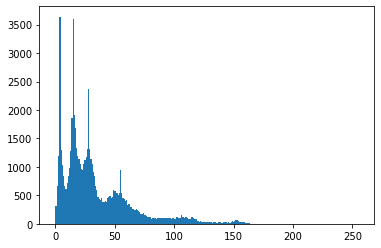

In [21]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('couple256.jpg', cv2.IMREAD_GRAYSCALE)
plt.bar(x = range(256), height = histogram(img), width = 1)
plt.show()

##### 히스토그램 밝기값 조절
>- 화소의 값을 전체적으로 크게 하면 더 밝은 이미지를 얻을 수 있고, 반대로 화소의 값을 전체적으로 작게 하면 더 어두운 이미지를 얻을 수 있음

In [22]:
import numpy as np

def brightness(img, threshold = 0):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype = np.uint8)
    
    for y in range(height):
        for x in range(width):
            temp = img[y][x] + threshold
            if( temp > 255) :
                img_[y][x] = 255
            elif (temp < 0):
                img_[y][x] = 0
            else:
                img_[y][x] = temp
    return img_

In [23]:
img = cv2.imread('couple256.jpg', cv2.IMREAD_GRAYSCALE)
img2 = brightness(img, threshold = 100)
cv2.imshow('Image', np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

(0.0, 256.0)

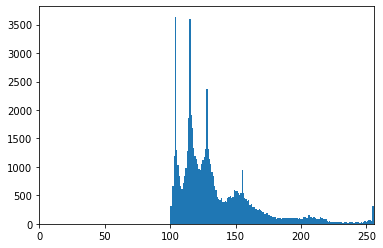

In [24]:
import matplotlib.pyplot as plt

img2 = brightness(img, threshold = 100)
plt.bar(x = list(range(256)), height = histogram(img2), width = 1)
plt.xlim([0,256])

#### 콘트라스트 강조
>- 콘트라스트 강조는 명암의 대비를 극대화 시켜 선명한 영상을 만드는 것
>- 입력 영상의 임의 구간을 출력 영상의 정해진 다른 구간에 매핑(정규화)
>- 입력 이미지의 농도 구간 a~b를 출력 이미지의 새로운 구간 a! ~ b!로 출력

In [25]:
import numpy as np

def contrast(img, low = 0, high = 255):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype = np.uint8)
    
    for y in range(height):
        for x in range(width):
            temp = (int)((255/(high-low)) * (img[y][x] - low))
            if (temp > 255):
                img_[y][x] = 255
            elif (temp <0):
                img_[y][x] = 0
            else:
                img_[y][x] = temp
    return img_

In [26]:
img = cv2.imread('couple256.jpg', cv2.IMREAD_GRAYSCALE)
img2 = contrast(img, 0, 160)
cv2.imshow('Image', np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

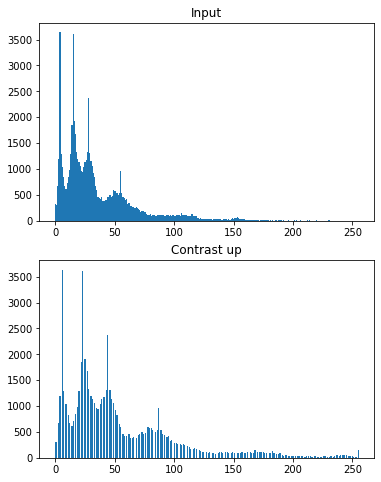

In [27]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('couple256.jpg', cv2.IMREAD_GRAYSCALE)
img2 = contrast(img, 0, 160)

plt.figure(figsize = (6,8))
plt.subplot(211)
plt.bar(x = range(256), height = histogram(img), width = 1)
plt.title('Input')

plt.subplot(212)
plt.bar(x = range(256), height = histogram(img2), width = 1)
plt.title('Contrast up')
plt.show()

#### cv2.normalize(scr, dst, alpha, beta, flag) ->dst
>- 콘트라스트 강조를 구현한 함수
>- alpha : 정규화하기 위한 구간 1, 이미지 콘트라스트 강조 시 0을 사용
>- beta :  정구화 하기 위한 구간 2, 이미지 콘트라스트 강조 시 255 사용

In [28]:
import cv2

img = cv2.imread('couple256.jpg', cv2.IMREAD_GRAYSCALE)
height, width = img.shape

for y in range(height):
    for x in range(width):
        if img[y,x] > 160:
            img[y,x] = 160
            
img2 = cv2.normalize(img, None, 0 , 255, cv2.NORM_MINMAX)
cv2.imshow('Image', np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

#### 히스토그램 이퀼라이제이션
>- 히스토그램 저네 영역에 골고루 분포되어 있을 때 좋은 이미지'
>- 히스토그램 이퀼라이제이션의 이론적인 방법은 이미지의 각 픽셀의 누적분포함수 값을 구하고, 히스토그램 균일화 공식에 대입하여 0~255 사이의 값으로 변환
>- 새롭게 구해진 값으로 이미지를 표현하면 균일화 된 이미지를 얻을 수 있음

##### 히스토그램 이퀼라이제이션 구현
>- scale_factor = 255 / (width * height)
>- 각 농도의 히스토그램 누적 합을 계산

In [29]:
import numpy as np

def equalization(img):
    height, width = img.shape
    img_in = img.copy()
    img_out = np.zeros(img_in.shape, dtype = np.uint8)
    histogram = np.zeros(256, dtype = int)
    sum_histo = np.zeros(256, dtype = int)
    
    for y in range(height):
        for x in range(width):
            histogram[img_in[y,x]] = histogram[img_in[y,x]] + 1
            
    sum = 0
    scale_factor = 255/ (width * height)
    for i in range(256):
        sum = sum + histogram[i]
        sum_histo[i] = np.ceil(sum * scale_factor)
        
    for y in range(height):
        for x in range(width):
            img_out[y,x] = sum_histo[img_in[y][x]]
    return img_out

In [30]:
import cv2

img = cv2.imread('couple256.jpg', cv2.IMREAD_GRAYSCALE)
img2 = equalization(img)
cv2.imshow('Image', np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

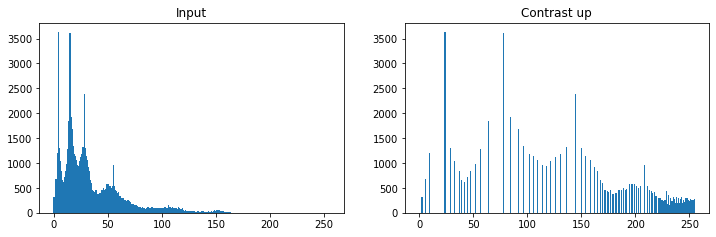

In [31]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('couple256.jpg', cv2.IMREAD_GRAYSCALE)
img2 = equalization(img)

plt.figure(figsize = (12, 3.5))
plt.subplot(121)
plt.bar(x = range(256), height = histogram(img), width = 1)
plt.title('Input')
plt.subplot(122)
plt.bar(x  = range(256), height = histogram(img2), width = 1)
plt.title('Contrast up')
plt.show()

##### Numpy를 이용한 히스토그램 이퀄라이제이션 구현
>- 히스토그램 이퀄라이제이션은 넘파이의 함수를 이용하면 반복문을 사용하지 않고, 쉽게 구현 가능

In [32]:
import numpy as np

def equalization2(img):
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    return cdf[img]

##### cv2.equalizeHist()

In [33]:
import cv2

img = cv2.imread('couple256.jpg', cv2.IMREAD_GRAYSCALE)

img2 = cv2.equalizeHist(img)
cv2.imshow('Image', np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

##### 누적 히스토그램 그래프
>- 이미지의 농도에 따라 화소 개수의 누적 비율을 그래프로 나타내면 우상향 화소의 개수가 균등하게 증가하는 그래프를 보이기 때문

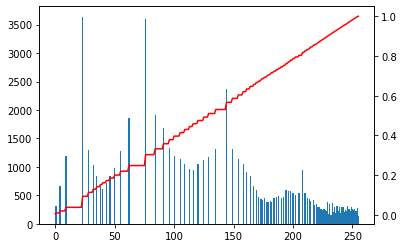

In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('couple256.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.equalizeHist(img)

hist = histogram(img2)

cumsum_hist = np.cumsum(hist)
sum_hist = np.sum(hist)
plt.bar(range(256), hist, width = 1)
ax = plt.twinx()
ax.plot(range(256), cumsum_hist/sum_hist, 'r')
plt.show()

#### 적응적 히스토그램 이퀄라이제이션
##### CLAHE
>- 적응적 히스토그램 이퀄라이제이션 :  각각 이미지의 개별 영역에 해당하는 여러 히스토그램을 계산하고 이를 사용하여 이미지의 밝기값을 재분배한다는 점, 로컬 대비를 개선하고 이미지의 각 영역에서 엣지의 정의를 향상시키는데 적합
>- AHE : 이미지의 비교적 균일한 영역에서 잡음을 과도하게 증폭(콘트라스트 강조)하는 경향
>- 적응형 히스토그램 이퀄라이제이션의 변형은 콘트라스트를 제한하여 이를 방지
>- 주어진 화소 값 근처의 대비 증폭은 변환 함수의 기울기에 의해 제공
>- 인접 누적 분포 함수의 기울기에 비례, 해당 화소 값에서 히스토그램값에 비례
>- 인접 누적 분포 함수의 기울기와 변환함수의 기울기 제한
>- 히스토그램이 클리핑 되는 값인 소위 클립 제한은 히스토그램의 정규화와 이에 따른 인접 여영역의 크기에 따라 달라짐
>- 클립 제한을 초과하는 히스토그램 부분은 버리지 않고 모든 히스토그램 빈에 균등하게 재배포 하는 것이 좋음
>- 재배포는 일부 빈을 다시 클립 제한 영역을 넘어서서 규정된 제한보다 크고 정확한 값이 이미지에 따라 가라 달라지는 효과적인 제한을 생성
##### cv2.createCLAHE(clipLimit = 40.0, tileGridSize = (8,8))
>- tileGridSize() : 히스토그램 이퀄라이제이션을 위한 그리드 크기, 입력 이미지는 동일한 크기의 직사각형 타일로 분할, 행과 열의 타일 수를 정의

In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('tsukuba.png', cv2.IMREAD_GRAYSCALE)

img2 = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
img3 = clahe.apply(img)

cv2.imshow('Equalization vs CLAHE', np.c_[img2, img3])
cv2.waitKey()
cv2.destroyAllWindows()

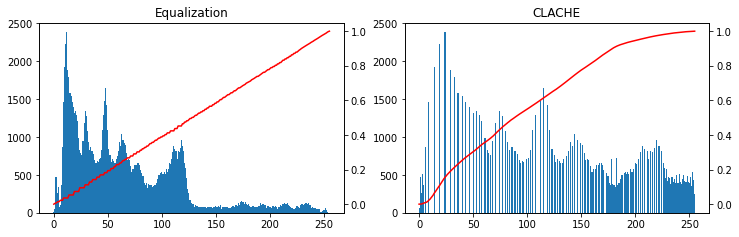

In [36]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('tsukuba.png', cv2.IMREAD_GRAYSCALE)

img2 = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
img3 = clahe.apply(img)

hist1 = histogram(img2)
cumsum_hist1 = np.cumsum(hist1)
sum_hist1 = np.sum(hist1)

hist2 = histogram(img3)
cumsum_hist2 = np.cumsum(hist2)
sum_hist2= np.sum(hist2)

plt.figure(figsize = (12, 3.5))
plt.subplot(121)
plt.bar(x = range(256), height = histogram(img), width = 1)
ax = plt.twinx()
ax.plot(range(256), cumsum_hist1/sum_hist1, 'r')
plt.title('Equalization')

plt.subplot(122)
plt.bar(x = range(256), height = histogram(img2), width = 1)
ax = plt.twinx()
ax.plot(range(256), cumsum_hist2/sum_hist2, 'r')
plt.title('CLACHE')
plt.show()

#### 완벽하게 평평한 히스토그램 이퀄라이제이션
>- 히스토그램 전체 영역에 완전히 균등하게 분포하도록 하는 방법
##### 히스토그램 평탄화 알고리즘
>- 농도레벨을 8단계로 규정, 화소의 수는 40개, 각 농도에 다른 화소의 개수를 구한 히스토그램이 어떻게 균일화 과정으로 되는 지 설명하기 위한 과정

In [1]:
class SortedPixel():
    def __init__(self, x, y, weight):
        self.x = x
        self.y = y
        self.weight = weight

In [11]:
import numpy as np

def get_weight(pixels, x, y):
    weight = 0
    xm = x - 1
    ym = y - 1
    xp = x + 1
    yp = y + 1
    d = np.zeros(8, dtype = int)
    height, width = pixels.shape
    
    if(xm < 0):
        xm = x
    if(ym < 0) : 
        ym = y
    if(xp >= width):
        xp = x
    if(yp >= height):
        yp = y
    
    d[0] = pixels[ym, xm]
    d[1] = pixels[ym, x]
    d[2] = pixels[ym, xp]
    d[3] = pixels[y, xm]
    d[4] = pixels[y, xp]
    d[5] = pixels[yp, xm]
    d[6] = pixels[yp, x]
    d[7] = pixels[yp, xp]
    
    weight = np.sum(d)
    return weight

In [12]:
# 코드 주위 8개 화소의 총합을 이용해 정렬하는 함수
# operator.attegetter()함수는 SortPixel 객체의 weight 속성을 정렬기준이 되는 키로 지정하기 위해 사용

from operator import attrgetter

def sort_by_weight(pixels, level, count):
    height, width  = pixels.shape
    data = []
    inum = 0
    weight = 0
    
    for y in range(height):
        for x in range(width):
            try:
                if(pixels[y,x] == level):
                    w = get_weight(pixels, x, y)
                    data.append(SortedPixel(x, y, w))
                    inum = inum + 1
            except:
                pass
    data.sort(key = attrgetter('weight'))
    
    return data

In [13]:
# 히스토그램 평탄화
import numpy as np

def flattening(img):
    height, width = img.shape
    img_in = img.copy()
    img_out = np.zeros(img.shape, dtype = np.uint8)
    histogram = np.zeros(256, dtype = int)
    
    for y in range(height):
        for x in range(width):
            histogram[img_in[y,x]] = histogram[img_in[y,x]] + 1
    low, high, delta = 255, 255, 0
    avg_pixel_count = (int)((height * width)/256)
    
    for i in range(255, -1, -1):
        sum = 0
        while(sum < avg_pixel_count):
            sum = sum + histogram[low]
            low = low -1
            
        low = low + 1
        delta = histogram[low] - (sum - avg_pixel_count)
        buffer = sort_by_weight(img_in, low, histogram[low])
        
        if(low < high):
            for y in range(height):
                for x in range(width):
                    if(img_in[y,x] >= low+1) & (img_in[y,x] <= high):
                        img_out[y,x] = i
                        
                        
        for j in range(delta):
            img_out[int(buffer[j].y), int(buffer[j].x)] = i
            img_in[int(buffer[j].y), int(buffer[j].x)] = low + 1
        
        histogram[low] = histogram[low] - delta
        high = low
        
    return img_out

In [15]:
import cv2

img = cv2.imread('couple256.jpg', cv2.IMREAD_GRAYSCALE)
img2 = flattening(img)
cv2.imshow('Image Flattening', np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

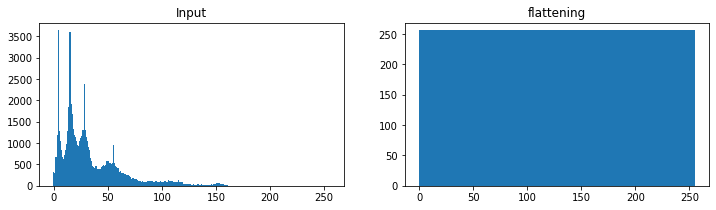

In [16]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('couple256.jpg', cv2.IMREAD_GRAYSCALE)
img2 = flattening(img)

hist1 = cv2.calcHist(images = [img], channels = [0], mask = None, histSize = [256], ranges = [0,256])
hist2 = cv2.calcHist(images = [img2], channels = [0], mask = None, histSize = [256], ranges = [0,256])

plt.figure(figsize = (12,3))
plt.subplot(121)
plt.bar(x = range(256), height = hist1.flatten(), width = 1)
plt.title('Input')

plt.subplot(122)
plt.bar(x = range(256), height = hist2.flatten(), width = 1)
plt.title('flattening')
plt.show()

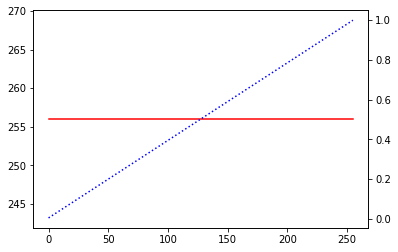

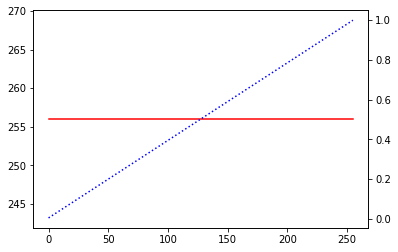

In [18]:
import cv2

img = cv2.imread('couple256.jpg', cv2.IMREAD_GRAYSCALE)
img2 = flattening(img)

hist2 = cv2.calcHist(images = [img2], channels =[0], mask = None, histSize = [256], ranges = [0,256])

cumsum_hist = np.cumsum(hist2)
sum_hist = np.sum(hist2)
plt.plot(range(256), hist2, 'r')
ax = plt.twinx()
ax.plot(range(256), cumsum_hist/sum_hist, 'b:')
plt.show(0)